In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Given that this problem involves multiple dataset, the process is divided in the following

**1.** Micro EDA- An Exploratory Data Analysis of just one dataset

**2.** Micro clustering

**3.** Data unification

**4.** Global clusters

**5.** Forecasting

**6.** Bonus problem

# Micro EDA

In [2]:
datasets = ['2015_01_purchases.xls','2015_02_purchases.xls','2015_03_purchases.xls','2015_05_purchases.xls','2015_06_purchases.xls','2015_07_purchases.xls',
'2015_08_purchases.xls','2015_09_purchases.xls','2015_10_purchases.xls','2015_11_purchases.xls','2015_12_purchases.xls','2016_01_purchases.xls','2016_02_purchases.xls',
'2016_03_purchases.xls','2016_04_purchases.xls','2016_05_purchases.xls','2016_06_purchases.xls','2016_07_purchases.xls','2016_08_purchases.xls','2016_09_purchases.xls',
'2016_10_purchases.xls','2016_11_purchases.xls','2016_12_purchases.xls','2017_01_purchases.xls','2017_02_purchases.xls','2017_03_purchases.xls','2017_04_purchases.xls',
'2017_05_purchases.xls','2017_06_purchases.xls','2017_07_purchases.xls','2017_08_purchases.xls','2017_09_purchases.xls','2017_10_purchases.xls','2017_11_purchases.xls',
'2018_01_purchases.xls']

Let's analyze just one month

In [3]:
data_2017_01 = pd.read_excel('./data/2017_01_purchases.xls')
data_2017_01.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2017-01-03,VR,72.61,GBP,72.61,GBP,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,2017-01-24,VR,85.51,GBP,85.51,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
2,2017-02-01,VR,10.09,GBP,10.09,GBP,shell fiveways 387,************1147,K020,Vehicle Fuel,RV1K2,Elders Group - Ladywood,A00,Adult & Communities
3,2017-01-04,VR,20.00,GBP,20.00,GBP,mibsons service st,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities
4,2017-01-05,VR,50.00,GBP,50.00,GBP,malthurst petroleu,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


In [4]:
data_2017_01['card_number'] = data_2017_01['CARD NUMBER'].apply(lambda x: x.replace('*', ''))
data_2017_01['card_number'] = pd.to_numeric(data_2017_01['card_number'])
data_2017_01['Directorate'] = data_2017_01['Directorate'].apply(lambda x: x.replace(' ', '')).str.lower()

In [5]:
data_2017_01.columns

Index(['TRANS DATE', 'TRANS VAT DESC', 'ORIGINAL GROSS AMT', 'ORIGINAL CUR',
       'BILLING GROSS AMT', 'BILLING CUR CODE', 'MERCHANT NAME', 'CARD NUMBER',
       'TRANS CAC CODE 1', 'TRANS CAC DESC 1', 'TRANS CAC CODE 2',
       'TRANS CAC DESC 2', 'TRANS CAC CODE 3', 'Directorate', 'card_number'],
      dtype='object')

In [6]:
data_2017_01['Directorate'].drop_duplicates()

0        adult&communities
247                 adults
252     corporateresources
496                  cyp&f
998           cyp&fschools
4007           development
4066         localservices
Name: Directorate, dtype: object

With a quick EDA, we can see that there are some anomalies. Although simple for the detection of anomalies, we can do a better process for the detection of the anomalies

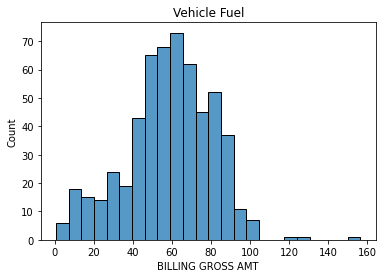

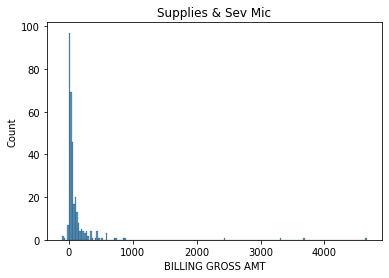

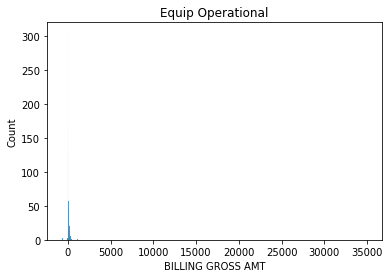

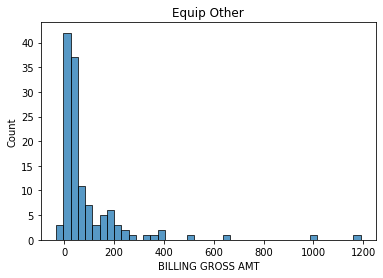

In [7]:
for transactions in data_2017_01['TRANS CAC DESC 1'].drop_duplicates()[:4]:
    fig, ax = plt.subplots()
    sns.histplot(data_2017_01.loc[data_2017_01['TRANS CAC DESC 1'] == transactions],x='BILLING GROSS AMT').set_title(transactions)
    plt.show()

Based on these histograms we found some anomalies, specially in the supplies and services and equip operational. Let's plot it in clusters so we can have a better  visualization

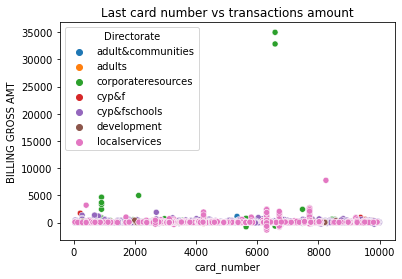

In [8]:
#plt.scatter(data_2017_01['card_number'], data_2017_01['BILLING GROSS AMT'], alpha=.2, label='TRANS CAC DESC 1')
sns.scatterplot(data=data_2017_01, x="card_number", y="BILLING GROSS AMT", hue="Directorate").set_title('Last card number vs transactions amount')
plt.show()

More useful than he other and we can say that corporate resources has at least two anomalies while local services has only one in the eyesight, but more can be done. First, let's join the data

Since this is a 1D data with all the rest of the features are factors or datetimes, instead of clusters we can use IQR outlier list and the three sigma rule

In [9]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [10]:
global_lowerbound,global_upperbound = outlier_treatment(data_2017_01['BILLING GROSS AMT'])

In [11]:
data_2017_01['Outlier'] = (data_2017_01['BILLING GROSS AMT']>global_upperbound) | (data_2017_01['BILLING GROSS AMT']< global_lowerbound)

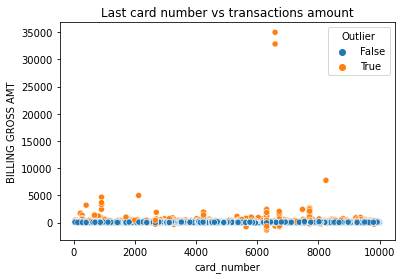

The outliers are the 11.50% of the cases


In [12]:
sns.scatterplot(data=data_2017_01, x="card_number", y="BILLING GROSS AMT", hue="Outlier").set_title('Last card number vs transactions amount')
plt.show()
print('The outliers are the {:.2f}% of the cases'.format(data_2017_01['Outlier'].sum()/data_2017_01['Outlier'].shape[0]*100))

Now, some areas areas have different scales than others, thus if I buy a car even its first monthly pay can be considered as an outlier if I group it with the groceries shopping costs. To reduce the number of outliers let's make a local outlier detection by directorate and type of purchase

In [13]:
def get_local_outliers(row, df, column):
    try:
        lower, upper = outlier_treatment(df.loc[df[column]==row[column]]['ORIGINAL GROSS AMT'])
        return (row['ORIGINAL GROSS AMT']>upper) | (row['ORIGINAL GROSS AMT']< lower)
    except:
        #print(row)
        return False

In [14]:
data_2017_01['IsDirectorateOutlier']=data_2017_01.apply(lambda x: get_local_outliers(x,data_2017_01,'Directorate'),axis=1)

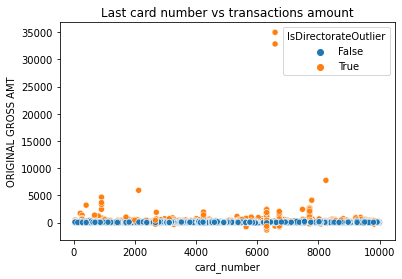

The outliers are the 10.92% of the cases


In [15]:
sns.scatterplot(data=data_2017_01, x="card_number", y="ORIGINAL GROSS AMT", hue="IsDirectorateOutlier").set_title('Last card number vs transactions amount')
plt.show()
print('The outliers are the {:.2f}% of the cases'.format(data_2017_01['IsDirectorateOutlier'].sum()/data_2017_01.shape[0]*100))

It is a .58% of difference, let's try with a more refined category

In [16]:
data_2017_01['IsAreaOutlier']=data_2017_01.apply(lambda x: get_local_outliers(x,data_2017_01,'TRANS CAC DESC 1'),axis=1)

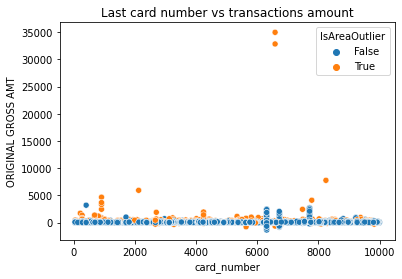

The outliers are the 7.81% of the cases


In [17]:
sns.scatterplot(data=data_2017_01, x="card_number", y="ORIGINAL GROSS AMT", hue="IsAreaOutlier").set_title('Last card number vs transactions amount')
plt.show()
print('The outliers are the {:.2f}% of the cases'.format(data_2017_01['IsAreaOutlier'].sum()/data_2017_01.shape[0]*100))

Now this make more sense. 7.81 is still a high number yet it is a more accurate way of classifying outliers

In [18]:
data_2017_01['IsCardOutlier']=data_2017_01.apply(lambda x: get_local_outliers(x,data_2017_01,'card_number'),axis=1)

Finally, as an experiment, we will go granular and go for the card number

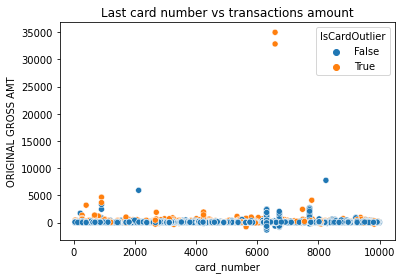

The outliers are the 9.18% of the cases


In [19]:
sns.scatterplot(data=data_2017_01, x="card_number", y="ORIGINAL GROSS AMT", hue="IsCardOutlier").set_title('Last card number vs transactions amount')
plt.show()
print('The outliers are the {:.2f}% of the cases'.format(data_2017_01['IsCardOutlier'].sum()/data_2017_01.shape[0]*100))

For the global analysis we are going to work with the area analysis since it is much better at getting outliers.

## Data unification

Let's see the columns

In [20]:
data_columns = ['TRANS DATE','ORIGINAL GROSS AMT','CARD NUMBER','TRANS CAC DESC 1','Directorate']
data_consolidated = pd.DataFrame(columns = data_columns)
#Critical columns 
for element in datasets:
    data = pd.read_excel('./data/'+element)
    data_consolidated = data_consolidated.append(data[data_columns])
    pass
print(data_columns)

['TRANS DATE', 'ORIGINAL GROSS AMT', 'CARD NUMBER', 'TRANS CAC DESC 1', 'Directorate']


In [21]:
data_consolidated.shape

(151442, 5)

In [22]:
data_consolidated = data_consolidated.dropna()
data_consolidated['Directorate'] = data_consolidated['Directorate'].apply(lambda x: x.replace(' ', '')).str.lower()

In [23]:
data_consolidated['Directorate'].replace({"adults&communities":"adult&communities"},inplace=True)
data_consolidated['Directorate'].replace({"adults&comms":"adult&communities"},inplace=True)
data_consolidated['Directorate'].replace({"cyo&f":"cyp&f"},inplace=True)

In [24]:

data_consolidated['card_number'] = data_consolidated['CARD NUMBER'].apply(lambda x: x.replace('*', ''))
data_consolidated['card_number'] = pd.to_numeric(data_consolidated['card_number'])

In [25]:
data_consolidated['Directorate'].drop_duplicates()

0              adult&communities
249           corporateresources
509                        cyp&f
1127                cyp&fschools
3785                 development
3941               localservices
209         corporateprocurement
441                       adults
0       adultsocialcareandhealth
Name: Directorate, dtype: object

Once the data is consolidated let's do the the anomaly detection

In [37]:
def get_upper_outliers(row, df, column):
    lower, upper = outlier_treatment(df.loc[df[column]==row[column]]['ORIGINAL GROSS AMT'])
    return upper

def get_lower_outliers(row, df, column):
    lower, upper = outlier_treatment(df.loc[df[column]==row[column]]['ORIGINAL GROSS AMT'])
    return lower

In [42]:
types_purchases = data_consolidated['TRANS CAC DESC 1'].drop_duplicates().values
#Creating a dataframe for as a pseudo dictionary
df_areas_outliers = pd.DataFrame(columns = ['TRANS CAC DESC 1'], data = types_purchases)
df_areas_outliers['upper_outlier']=df_areas_outliers.apply(lambda x: get_upper_outliers(x,data_consolidated,'TRANS CAC DESC 1'),axis=1)
df_areas_outliers['lower_outlier']=df_areas_outliers.apply(lambda x: get_lower_outliers(x,data_consolidated,'TRANS CAC DESC 1'),axis=1)


In [61]:
df_areas_outliers.head()
df_areas_outliers.sort_values(by=['upper_outlier'])

,TRANS CAC DESC 1,upper_outlier,lower_outlier
101,Relocn&RecruitIncent,4.35000,4.35000
140,Oil,11.98000,11.98000
141,Audit Fees,13.00000,13.00000
125,HRM CO Building,16.57000,16.57000
13,Vehicle OthrunCosts,19.80000,-5.80000
...,...,...,...
54,Disinfestation,2068.42875,-1207.58125
81,Transport Insurance,2681.86125,-1340.84875
57,SchGovBrds Clerks,3113.53125,-1827.11875
107,Other Third Parties,3851.36250,-1781.93750


In [72]:
def get_local_outliers_area(row):
    try:
        return (row['ORIGINAL GROSS AMT']>=row['upper_outlier']) | (row['ORIGINAL GROSS AMT']<= row['lower_outlier'])
    except Exception as e:
        print(row)
        print(e)
        return False

In [68]:
data_consolidated_test = data_consolidated.copy()
data_consolidated_test = data_consolidated_test.head()
data_consolidated_test['IsAreaOutlier']=data_consolidated_test.apply(lambda x: get_local_outliers_area(x,df_areas_outliers),axis=1) 
#data_consolidated_test = data_consolidated_test.merge(df_areas_outliers, left='TRANS CAC DESC 1', rsuffix='TRANS CAC DESC 1')
pd.merge(left=data_consolidated_test,right=df_areas_outliers, on='TRANS CAC DESC 1', how='left')
#data_consolidated_test

,TRANS DATE,ORIGINAL GROSS AMT,CARD NUMBER,TRANS CAC DESC 1,Directorate,card_number,IsAreaOutlier,upper_outlier,lower_outlier
0,2015-01-08,52.84,************5770,Vehicle Fuel,adult&communities,5770,False,110.55,2.47
1,2015-01-21,10.00,************5770,Vehicle Fuel,adult&communities,5770,False,110.55,2.47
2,2015-01-22,20.01,************5770,Vehicle Fuel,adult&communities,5770,False,110.55,2.47
3,2015-01-23,57.96,************5770,Vehicle Fuel,adult&communities,5770,False,110.55,2.47
4,2015-01-07,60.50,************8143,Vehicle Fuel,adult&communities,8143,False,110.55,2.47


In [71]:
data_consolidated_with_bounds = pd.merge(left=data_consolidated,right=df_areas_outliers, on='TRANS CAC DESC 1', how='left')

In [73]:
data_consolidated_with_bounds['IsOutlier'] = (data_consolidated_with_bounds['ORIGINAL GROSS AMT']>data_consolidated_with_bounds['upper_outlier']) | (data_consolidated_with_bounds['ORIGINAL GROSS AMT']<data_consolidated_with_bounds['lower_outlier'])

In [75]:
data_consolidated_with_bounds.head()

,TRANS DATE,ORIGINAL GROSS AMT,CARD NUMBER,TRANS CAC DESC 1,Directorate,card_number,upper_outlier,lower_outlier,IsOutlier
0,2015-01-08,52.84,************5770,Vehicle Fuel,adult&communities,5770,110.55,2.47,False
1,2015-01-21,10.00,************5770,Vehicle Fuel,adult&communities,5770,110.55,2.47,False
2,2015-01-22,20.01,************5770,Vehicle Fuel,adult&communities,5770,110.55,2.47,False
3,2015-01-23,57.96,************5770,Vehicle Fuel,adult&communities,5770,110.55,2.47,False
4,2015-01-07,60.50,************8143,Vehicle Fuel,adult&communities,8143,110.55,2.47,False


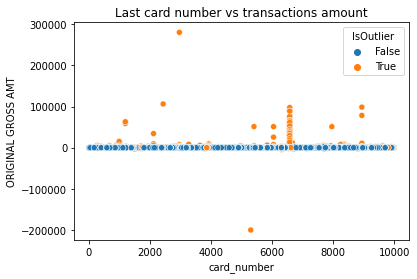

In [76]:
sns.scatterplot(data=data_consolidated_with_bounds, x="card_number", y="ORIGINAL GROSS AMT", hue="IsOutlier").set_title('Last card number vs transactions amount')
plt.show()

## Forecasting

In [17]:
X=data_2017_01[['ORIGINAL GROSS AMT','card_number']].values
#X
#X_train = np.r_[X + 2, X - 2]
#X_train.shape

In [18]:
from sklearn import svm
X_test = 0.3 * np.random.randn(100, 2)
X_test.shape

(100, 2)

In [19]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X)

OneClassSVM(gamma=0.1, nu=0.1)

In [20]:
X_test = data_consolidated[['ORIGINAL GROSS AMT','card_number']]
y_pred_test = clf.predict(X_test)

In [21]:
y_pred_test

array([-1, -1, -1, ..., -1,  1, -1], dtype=int64)

In [22]:
data_consolidated['predicted']=y_pred_test
data_consolidated['predicted'].drop_duplicates()

0    -1
20    1
Name: predicted, dtype: int64

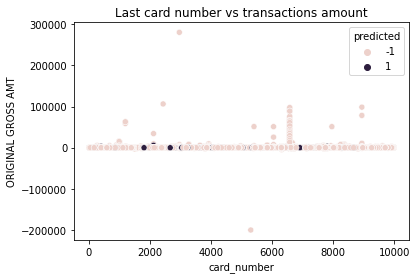

In [23]:
sns.scatterplot(data=data_consolidated, x="card_number", y="ORIGINAL GROSS AMT", hue="predicted").set_title('Last card number vs transactions amount')
plt.show()

In [143]:
(data_consolidated['Directorate'].value_counts()/data_consolidated['Directorate'].count())*100

CYP&F SCHOOLS                   47.726669
Local Services                  23.288035
CYP&F                           12.740870
Corporate Resources              6.710505
Adult & Communities              6.708515
DEVELOPMENT                      1.753769
Adult Social Care and Health     0.374244
CYP&F                            0.242197
CYP&F Schools                    0.227598
CYP&F                            0.084271
CYO&F                            0.061710
Development                      0.025879
Local services                   0.018579
Adults                           0.015925
Adults & Comms                   0.011944
Adults & Communities             0.006636
Corporate Procurement            0.001991
                                 0.000664
Name: Directorate, dtype: float64

In [72]:
from sklearn.svm import OneClassSVM
X = np.array([[0], [0.44], [0.45], [0.46], [1]])
clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)
clf.score_samples(X)

array([1.77987316, 2.05479873, 2.05560497, 2.05615569, 1.73328509])

In [83]:
np.array([[0], [0.44], [0.45], [0.46], [1]])

array([[0.  ],
       [0.44],
       [0.45],
       [0.46],
       [1.  ]])

In [84]:
data_2017_01['ORIGINAL GROSS AMT'].values.reshape(-1, 1)

array([[72.61],
       [85.51],
       [10.09],
       ...,
       [17.98],
       [20.69],
       [26.99]])

In [ ]:
sns.scatterplot(data=data_consolidated, x="card_number", y="ORIGINAL GROSS AMT", hue="Directorate").set_title('Last card number vs transactions amount')
plt.show()

In [85]:
X = data_2017_01['ORIGINAL GROSS AMT'].values.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(X)
clf.predict(X)
clf.score_samples(X)

array([23.26173615, 22.91460022, 23.27045982, ..., 23.27027016,
       23.27030632, 23.27025284])

In [ ]:
data_2017_01.loc[data_2017_01['ORIGINAL GROSS AMT']!= data_2017_01['BILLING GROSS AMT']]

d:\Globant\Task2\.venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
d:\Globant\Task2\.venv\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


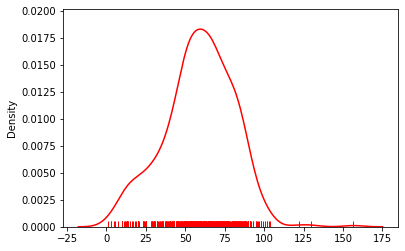

In [22]:
fig, ax = plt.subplots()
sns.distplot(data_2017_01.loc[data_2017_01['TRANS CAC DESC 1'] == 'Vehicle Fuel']['BILLING GROSS AMT'].values, rug=True, hist=False, ax=ax, color ='r')
plt.show()

In [ ]:

sns.distplot(data_2017_01.loc[data_2017_01['TRANS CAC DESC 1'] == 'Supplies & Sev Mic']['BILLING GROSS AMT'].values, rug=True, hist=False, ax=ax)

In [120]:
for i in range(2015,2019):
    for j in range(1,13):
        print('{}_{}_purchases.xls'.format(i,str(j).zfill(2)))

2015_01_purchases.xls
2015_02_purchases.xls
2015_03_purchases.xls
2015_04_purchases.xls
2015_05_purchases.xls
2015_06_purchases.xls
2015_07_purchases.xls
2015_08_purchases.xls
2015_09_purchases.xls
2015_10_purchases.xls
2015_11_purchases.xls
2015_12_purchases.xls
2016_01_purchases.xls
2016_02_purchases.xls
2016_03_purchases.xls
2016_04_purchases.xls
2016_05_purchases.xls
2016_06_purchases.xls
2016_07_purchases.xls
2016_08_purchases.xls
2016_09_purchases.xls
2016_10_purchases.xls
2016_11_purchases.xls
2016_12_purchases.xls
2017_01_purchases.xls
2017_02_purchases.xls
2017_03_purchases.xls
2017_04_purchases.xls
2017_05_purchases.xls
2017_06_purchases.xls
2017_07_purchases.xls
2017_08_purchases.xls
2017_09_purchases.xls
2017_10_purchases.xls
2017_11_purchases.xls
2017_12_purchases.xls
2018_01_purchases.xls
2018_02_purchases.xls
2018_03_purchases.xls
2018_04_purchases.xls
2018_05_purchases.xls
2018_06_purchases.xls
2018_07_purchases.xls
2018_08_purchases.xls
2018_09_purchases.xls
2018_10_pu